In [105]:
import pandas as pd
df= pd.read_csv('./서울(동대문ver5).csv', encoding='utf-8', low_memory=False)
df

,소재지전체주소,사업장명,업태구분명,review,latitude,longitude,target,데이트,맛,서비스,청결
0,서울 동대문구 경희대로 5 가동 2층,오레노카츠 경희대점,일식,"['매장', '새로', '청결하다', '돈가스', '맛있다', '좋아요', '체다'...",37.592063,127.052165,1,1,1,1,1
1,서울 동대문구 경희대로1길 35 봄의정원 회기점,봄의정원 회기점,양식,"['두번째', '방문', '입니다', '예약', '넓은', '자리', '안내', '...",37.591739,127.050250,0,1,1,1,1
2,서울 동대문구 회기로25길 23-5 1층,레알라면,라면,"['오렌지', '안', '맵', '주문', '오렌지', '맵', '주문', '너',...",37.591131,127.055390,1,0,1,1,1
3,서울 동대문구 회기로23길 7 1층,옵소,한식,"['인테리어', '이쁘고', '매장', '청결하다', '좌석', '편해요', '곱창...",37.591185,127.053945,1,1,1,1,1
4,서울 동대문구 회기로21길 29 고깃집도훈,고깃집도훈,한식,"['역대', '급', '냉', '삼', '집', '발견', '듀록', '삼겹살', ...",37.592679,127.053131,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
4138,서울 동대문구 휘경로 35-1 그옛날1947왕만두 이문점,그옛날1947왕만두 이문점,한식,"['모', '왕만', '걸', '대체', '땅', '새우', '찐빵', '땅', '...",37.594988,127.063831,1,0,1,1,1
4139,서울 동대문구 이문로17길 14,장수식당,한식,"['백반', '청결하다', '맛있다', '삼계탕', '맛있다', '돼지', '불',...",37.594805,127.058140,1,0,1,1,1
4140,서울 동대문구 천장산로 47 2층,더카페하임즈 본점,카페,"['생각', '맛있다', '접근성', '낮은', '위치', '자주', '갓', '구...",37.600298,127.057313,1,0,1,1,0
4141,서울 동대문구 신이문로 17,카페우리동네,카페,"['제', '아지트', '혼자', '더욱', '번장', '좋겠습니다', '청결하다'...",37.603309,127.064184,1,0,1,1,1


In [97]:
import re

# Function to clean the text
def clean_text(text):
    # Remove special characters
    text = re.sub(r'\W', ' ', text)
    # Remove numbers
    text = re.sub(r'\d', ' ', text)
    # Remove single characters
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)
    # Substitute multiple spaces with a single space
    text = re.sub(r'\s+', ' ', text, flags=re.I)
    # Convert to lowercase
    text = text.lower()

    return text

# Apply the function to the 'review' column
df['review'] = df['review'].apply(clean_text)

df.head()

,소재지전체주소,사업장명,업태구분명,review,latitude,longitude,target,데이트,맛,서비스,청결
0,서울 동대문구 경희대로 5 가동 2층,오레노카츠 경희대점,일식,매장 새로 청결하다 돈가스 맛있다 좋아요 체다 치즈 소스 제공 옵션 있어 좋구 회...,37.592063,127.052165,1,1,1,1,1
1,서울 동대문구 경희대로1길 35 봄의정원 회기점,봄의정원 회기점,양식,두번째 방문 입니다 예약 넓은 자리 안내 해 레드와인 차갑게 요구 하니 해주시 전...,37.591739,127.050250,0,1,1,1,1
2,서울 동대문구 회기로25길 23-5 1층,레알라면,라면,오렌지 안 맵 주문 오렌지 맵 주문 너 어어 무 매워서 이틀 고생 두번째 방문 일...,37.591131,127.055390,1,0,1,1,1
3,서울 동대문구 회기로23길 7 1층,옵소,한식,인테리어 이쁘고 매장 청결하다 좌석 편해요 곱창 부위 설명 청결하다 기분 좋고 배...,37.591185,127.053945,1,1,1,1,1
4,서울 동대문구 회기로21길 29 고깃집도훈,고깃집도훈,한식,역대 급 냉 삼 집 발견 듀록 삼겹살 가격 있는것도 감동 맛있다 백 선생님 특 제...,37.592679,127.053131,0,0,1,1,1


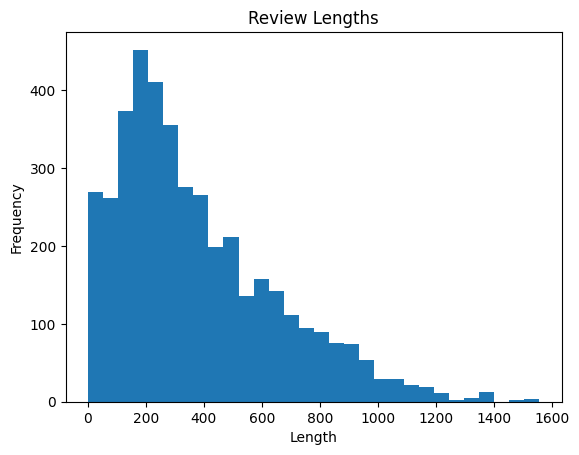

In [98]:
import matplotlib.pyplot as plt

# 리뷰 길이를 계산합니다.
review_lengths = [len(review) for review in df['review']]

# 히스토그램을 그립니다.
plt.hist(review_lengths, bins=30)
plt.title('Review Lengths')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.show()


In [99]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import pandas as pd

# Set maximum vocabulary size and maximum sentence length
MAX_VOCAB_SIZE = 5000
MAX_SENTENCE_LENGTH = 900

# Load the test data
# test_data = pd.read_csv('test_data.csv')  # Replace with your test data file

# Tokenize the text
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(df['review'])

# Convert text to sequences
test_sequences = tokenizer.texts_to_sequences(df['review'])

# Pad sequences
X_test = pad_sequences(test_sequences, maxlen=MAX_SENTENCE_LENGTH)

# Define the target
y_test = df[['데이트', '맛', '서비스', '청결']].values


In [100]:
from keras.models import load_model

# Load the model
model = load_model('다중출력모델_model.keras')

# Perform prediction
predictions = model.predict(X_test)
print(predictions)


130/130 [==============================] - 27s 205ms/step
[array([[0.20564729],
       [0.9917251 ],
       [0.9925219 ],
       ...,
       [0.05831513],
       [0.9956432 ],
       [0.1579756 ]], dtype=float32), array([[0.9981513 ],
       [0.9981969 ],
       [0.9985441 ],
       ...,
       [0.99159056],
       [0.998871  ],
       [0.99595124]], dtype=float32), array([[0.99694145],
       [0.9962176 ],
       [0.9966716 ],
       ...,
       [0.9797068 ],
       [0.99630946],
       [0.97734076]], dtype=float32), array([[0.99343187],
       [0.00469114],
       [0.00461354],
       ...,
       [0.00353321],
       [0.01096983],
       [0.01328957]], dtype=float32)]


In [101]:
# Convert probabilities to binary predictions
binary_predictions = [(pred > 0.5).astype(int) for pred in predictions]

# Print binary predictions
for i, label in enumerate(targets):
    print(f"Binary predictions for {label}:")
    print(binary_predictions[i])

Binary predictions for 데이트:
[[0]
 [1]
 [1]
 ...
 [0]
 [1]
 [0]]
Binary predictions for 맛:
[[1]
 [1]
 [1]
 ...
 [1]
 [1]
 [1]]
Binary predictions for 서비스:
[[1]
 [1]
 [1]
 ...
 [1]
 [1]
 [1]]
Binary predictions for 청결:
[[1]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


In [76]:
df

,소재지전체주소,사업장명,업태구분명,review,latitude,longitude,target,데이트,맛,서비스,청결
0,서울 동대문구 경희대로 5 가동 2층,오레노카츠 경희대점,일식,매장 새로 청결하다 돈가스 맛있다 좋아요 체다 치즈 소스 제공 옵션 있어 좋구 회...,37.592063,127.052165,1,1,1,1,1
1,서울 동대문구 경희대로1길 35 봄의정원 회기점,봄의정원 회기점,양식,두번째 방문 입니다 예약 넓은 자리 안내 해 레드와인 차갑게 요구 하니 해주시 전...,37.591739,127.050250,0,1,1,1,1
2,서울 동대문구 회기로25길 23-5 1층,레알라면,라면,오렌지 안 맵 주문 오렌지 맵 주문 너 어어 무 매워서 이틀 고생 두번째 방문 일...,37.591131,127.055390,1,0,1,1,0
3,서울 동대문구 회기로23길 7 1층,옵소,한식,인테리어 이쁘고 매장 청결하다 좌석 편해요 곱창 부위 설명 친절하셔서 기분 좋고 ...,37.591185,127.053945,1,1,1,1,1
4,서울 동대문구 회기로21길 29 고깃집도훈,고깃집도훈,한식,역대 급 냉 삼 집 발견 듀록 삼겹살 가격 있는것도 감동 맛있다 백 선생님 특 제...,37.592679,127.053131,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
4138,서울 동대문구 휘경로 35-1 그옛날1947왕만두 이문점,그옛날1947왕만두 이문점,한식,모 왕만 걸 대체 땅 새우 찐빵 땅 간밤 출출했는데 맛있다 친절해요 맛있다 혼합 ...,37.594988,127.063831,1,0,1,1,0
4139,서울 동대문구 이문로17길 14,장수식당,한식,백반 청결하다 맛있다 삼계탕 맛있다 돼지 불 백 맛있다 맛있다 글 맛있다 좋아요 ...,37.594805,127.058140,1,0,1,1,1
4140,서울 동대문구 천장산로 47 2층,더카페하임즈 본점,카페,생각 맛있다 접근성 낮은 위치 자주 갓 구 운 빵 냄새 좋아요 포장 중 입 커피 ...,37.600298,127.057313,1,0,1,1,0
4141,서울 동대문구 신이문로 17,카페우리동네,카페,제 아지트 혼자 더욱 번장 좋겠습니다 친절하시고 편안하게 개인 적 멍 좋습니다 오...,37.603309,127.064184,1,0,1,1,1


In [102]:
import pandas as pd

# Convert y_test to a DataFrame
y_test_df = pd.DataFrame(y_test, columns=['데이트', '맛', '서비스', '청결'])

# Convert binary predictions to DataFrames
binary_predictions_dfs = [pd.DataFrame(pred, columns=[f'{label}_예측']) for pred, label in zip(binary_predictions, targets)]

# Concatenate y_test_df and binary_predictions_dfs
result_df = pd.concat([y_test_df] + binary_predictions_dfs, axis=1)

result_df


,데이트,맛,서비스,청결,데이트_예측,맛_예측,서비스_예측,청결_예측
0,1,1,1,1,0,1,1,1
1,1,1,1,1,1,1,1,0
2,0,1,1,1,1,1,1,0
3,1,1,1,1,1,1,1,1
4,0,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...
4138,0,1,1,1,1,1,1,0
4139,0,1,1,1,0,1,1,0
4140,0,1,1,0,0,1,1,0
4141,0,1,1,1,1,1,1,0


In [103]:
from sklearn.metrics import accuracy_score, f1_score

# Calculate accuracy and F1 score for each label
metrics = [(accuracy_score(y_test[:, i], binary_predictions[i]), f1_score(y_test[:, i], binary_predictions[i])) for i in range(len(targets))]

# Print accuracies and F1 scores
for label, (accuracy, f1) in zip(targets, metrics):
    print(f'For {label}:')
    print(f'  Accuracy: {accuracy:.2f}')
    print(f'  F1 Score: {f1:.2f}')


For 데이트:
  Accuracy: 0.61
  F1 Score: 0.43
For 맛:
  Accuracy: 0.96
  F1 Score: 0.98
For 서비스:
  Accuracy: 0.96
  F1 Score: 0.98
For 청결:
  Accuracy: 0.41
  F1 Score: 0.42


In [38]:
df['review'][1]

' 두번째 방문 입니다 예약 넓은 자리 안내 해 레드와인 차갑게 요구 하니 해주시 전보 음식 빠르게 즐거웠어요 조명 인테리어 여성 인기 많을 없을 봄 정원 봄 계절 내내 맛있다 음식 너 무제 스타일 파스타 간이 강해서 물 간도 적당하고 양도 적당하고 가성 비도 쵝 오예 친절 만족 행복한 시간 회기 이런 있다니요 외관 예쁘더니 내부 더더 예쁜 음식 예쁜거에요 사실 예쁘기만 줄 맛있다 미쳤어요 진짜 머쉬룸 크림 파스타 왕 추천 입니다 점심 와인 못 아쉬웠어요 다음 꼭 와인 징 직원 짱짱 친절하셔서 내내 기분 좋았어여 행복하네여 어어 맛있다 느낌 아니지만 음식 청결하다 인테리어 예뻐서 데이트 가기 좋을 같아요 저 개인 적 구 파스타 더 맛있다 조금 특별한 기분 음식 있어 좋았어요 음식 맛있다 자극 적 와인 한잔 딱좋았네요 음식 주 문 듯 남아 포장 포장 안좋아요 아쉬웠네요 간이 약간 싱거운가 그러면서도 거 안좋아요 파스타 맛있다 닭고기 야채 맛있다 제로 콜라 있어서 더 만족 분위기 좋고 청결하다 음식 평타 이상 봄 정원 이름 예쁨 돼지고기 닭고기 파스타 맛있다 제로 콜라 있어서 좋았구요 생일 와인 한잔 서비스 주심 명 예약 매장 이쁘고 음식 맛있다 즐거운 생파 첫 타임 층 거의 예 약 석 예약 필수 듯 다음 가족 방문 좋은 사람과 맛있다 식사 있어서 좋았습니다 분위기 좋아 재 방문 의사 있습니다 '

In [104]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 900)]                0         []                            
                                                                                                  
 embedding_21 (Embedding)    (None, 900, 64)              320000    ['input_2[0][0]']             
                                                                                                  
 lstm_21 (LSTM)              (None, 64)                   33024     ['embedding_21[0][0]']        
                                                                                                  
 dense_24 (Dense)            (None, 1)                    65        ['lstm_21[0][0]']             
                                                                                            